In [1]:
from framed.omics.simulation import GIMME, eflux
from framed.io_utils.sbml import load_cbmodel
from framed.omics.dataset import DataSet
from framed.analysis.simulation import pFBA
from framed.experimental.fluxutils import compare_fluxes
from framed.experimental.benchmark import benchmark, run_method
from collections import OrderedDict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gurobipy import setParam

setParam('FeasibilityTol', 1e-9) # fixes failed simulation in EFlux
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
%run '../src/gpr_mapping.py'
%run '../src/simulation.py'
%run '../src/transcriptomics.py'

## Load model and Ishii dataset

In [4]:
modelpath = '../../models/iAF1260.xml'
model = load_cbmodel(modelpath, flavor='cobra')
model.set_lower_bound('R_EX_glc_e', 0)
model_ext = transform(model, inplace=False)

In [5]:
dataset = DataSet('../../data/ishii2007/dataset.json')
measured_fluxes = ['R_EX_glc_e']

## Benchmark pFBA, gene-pFBA, GIMME, gene-GIMME, E-Flux, gene-EFlux

In [ ]:
%time result_pFBA = benchmark(run_pFBA, model, dataset, measured_fluxes=measured_fluxes)
%time result_g_pFBA = benchmark(run_g_pFBA, model_ext, dataset, measured_fluxes=measured_fluxes)

In [8]:
%time result_GIMME = benchmark(run_GIMME, model, dataset, parsimonious=True, measured_fluxes=measured_fluxes)
%time result_g_GIMME = benchmark(run_gpr_GIMME, model_ext, dataset, parsimonious=True, measured_fluxes=measured_fluxes)
%time result_eflux = benchmark(run_eflux, model, dataset, parsimonious=True, measured_fluxes=measured_fluxes)
%time result_gpr_eflux = benchmark(run_gpr_eflux, model_ext, dataset, parsimonious=True, measured_fluxes=measured_fluxes)

CPU times: user 42.1 s, sys: 595 ms, total: 42.7 s
Wall time: 43 s
Biomass reaction detected: R_Ec_biomass_iAF1260_core_59p81M
CPU times: user 1min 39s, sys: 1.13 s, total: 1min 40s
Wall time: 1min 41s
CPU times: user 47.3 s, sys: 575 ms, total: 47.9 s
Wall time: 58.2 s
CPU times: user 2min 7s, sys: 1.53 s, total: 2min 8s
Wall time: 2min 30s


In [9]:
error_pFBA = [x[0] for x in result_pFBA.values()]
error_g_pFBA = [x[0] for x in result_g_pFBA.values()]
error_GIMME = [x[0] for x in result_GIMME.values()]
error_g_GIMME = [x[0] for x in result_g_GIMME.values()]
error_eflux = [x[0] for x in result_eflux.values()]
error_g_eflux = [x[0] for x in result_gpr_eflux.values()]

## Load Gerosa dataset

In [10]:
dataset = DataSet('../../data/gerosa2015/dataset.json')
measured_fluxes = {condition: ['R_EX_{}_e'.format(met)]
                   for condition, met in dataset.carbon_source.iteritems()}

In [11]:
%time result_pFBA2 = benchmark(run_pFBA, model, dataset, measured_fluxes=measured_fluxes)
%time result_g_pFBA2 = benchmark(run_g_pFBA, model_ext, dataset, measured_fluxes=measured_fluxes)
%time result_GIMME2 = benchmark(run_GIMME, model, dataset, parsimonious=True, measured_fluxes=measured_fluxes)
%time result_g_GIMME2 = benchmark(run_gpr_GIMME, model_ext, dataset, parsimonious=True, measured_fluxes=measured_fluxes)
%time result_eflux2 = benchmark(run_eflux, model, dataset, parsimonious=True, measured_fluxes=measured_fluxes)
%time result_gpr_eflux2 = benchmark(run_gpr_eflux, model_ext, dataset, parsimonious=True, measured_fluxes=measured_fluxes)

CPU times: user 12 s, sys: 117 ms, total: 12.1 s
Wall time: 13.4 s
CPU times: user 21.6 s, sys: 406 ms, total: 22 s
Wall time: 26.3 s
CPU times: user 13.5 s, sys: 140 ms, total: 13.6 s
Wall time: 14.2 s
CPU times: user 33.3 s, sys: 287 ms, total: 33.6 s
Wall time: 36.5 s
CPU times: user 15.6 s, sys: 167 ms, total: 15.8 s
Wall time: 18.8 s
CPU times: user 43.7 s, sys: 502 ms, total: 44.2 s
Wall time: 53.5 s


In [12]:
error_pFBA2 = [x[0] for x in result_pFBA2.values()]
error_g_pFBA2 = [x[0] for x in result_g_pFBA2.values()]
error_GIMME2 = [x[0] for x in result_GIMME2.values()]
error_g_GIMME2 = [x[0] for x in result_g_GIMME2.values()]
error_eflux2 = [x[0] for x in result_eflux2.values()]
error_g_eflux2 = [x[0] for x in result_gpr_eflux2.values()]

## Plot results

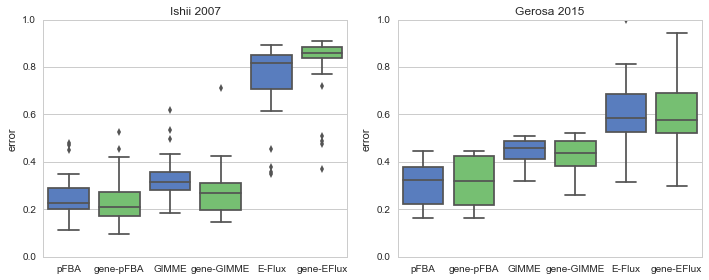

In [17]:
data = OrderedDict([('pFBA', error_pFBA),
                    ('gene-pFBA', error_g_pFBA),
                    ('GIMME', error_GIMME),
                    ('gene-GIMME', error_g_GIMME),
                    ('E-Flux', error_eflux),
                    ('gene-EFlux', error_g_eflux)])

data2 = OrderedDict([('pFBA', error_pFBA2),
                     ('gene-pFBA', error_g_pFBA2),
                     ('GIMME', error_GIMME2),
                     ('gene-GIMME', error_g_GIMME2),
                     ('E-Flux', error_eflux2),
                     ('gene-EFlux', error_g_eflux2)])

fig, axs = plt.subplots(1,2,figsize=(10,4))
sns.boxplot(pd.DataFrame(data), ax=axs[0], palette=sns.color_palette("muted", n_colors=2))  
sns.boxplot(pd.DataFrame(data2), ax=axs[1], palette=sns.color_palette("muted", n_colors=2))
axs[0].set_title('Ishii 2007')
axs[1].set_title('Gerosa 2015')
axs[0].set_ylim((0,1))
axs[1].set_ylim((0,1))
axs[0].set_ylabel('error')
axs[1].set_ylabel('error')
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.savefig('../../results/transcriptomics/transcriptomics.png', dpi=150)